# Combined Exercise 2

### Total Marks: 100 marks (Part 1: `40 Marks` and Part 2: `60 Marks`)


**Allowed libraries to Use**:

- Pandas
- NumPy
- Matplotlib (For visualization should use only Matplotlib)
and Graph should include x-axis label, y-axis label and Title 


**Note:** 
1. Please submit pdf file along with ipynb file. You need to show the basis of your calculation or inference. 

# Part 1 (40 Marks)

The following questions needs to be answered for the dataset in the below link

http://files.grouplens.org/datasets/movielens/ml-1m.zip

This dataset mainly contains three `.dat` files and data available in this file is in a tabular format and delimited with a **::** as a separator. 

For more details please go through the **"README"** file which is available in the dataset.

**Note:** Load the dataset into `CSV file` by using pandas libray into three different dataframe stated (users, ratings and movies)


## Questions:

**1. Find out the total number of movies, total number of ratings and total number of users_who_rated for movies (9 marks)**

**2. Visualize the distribution of overall rating by users (3 marks)**

**3. Visualize the users rating distribution (3 marks)**

**4. Genre distribution as a pie chart (10 marks)**  
ALthough there can be mutiple genre assigned to one movie. We'll assume that first Genre is the primary. Pie chart can be created based on that first Genre

**5. List out top 15 ranked movies (consider only those movies which are rated by atleast 100 users) (15 marks)**





## PART 1 Question 1 Answer

In [1]:
import pandas as pd

In [135]:
movies = pd.read_csv('movies.dat', sep="::", names = ['MovieID','Title','Genres'])
ratings = pd.read_csv('ratings.dat', sep="::", names = ['UserID','MovieID','Rating','Timestamp'])
users = pd.read_csv('ratings.dat', sep="::", names = ['UserID','Gender','Age','Occupation','Zip-code'])

C:\Users\jymch\anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.
C:\Users\jymch\anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
C:\Users\jymch\anaconda3\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from th

In [38]:
print(movies.isnull().sum())
print("--")
print(movies.nunique())
print("--")
print(ratings.isnull().sum())
print("--")
print(ratings.nunique())
print("--")
print(users.isnull().sum())
print("--")
print(users.nunique())
print("--")
print(len(ratings), len(users),len(movies))

MovieID    0
Title      0
Genres     0
dtype: int64
--
MovieID    3883
Title      3883
Genres      301
dtype: int64
--
UserID       0
MovieID      0
Rating       0
Timestamp    0
dtype: int64
--
UserID         6040
MovieID        3706
Rating            5
Timestamp    458455
dtype: int64
--
UserID              0
Gender              0
Age                 0
Occupation          0
Zip-code      1000209
dtype: int64
--
UserID          6040
Gender          3706
Age                5
Occupation    458455
Zip-code           0
dtype: int64
--
1000209 1000209 3883


In [39]:
print(users.nunique())
print(movies.nunique())
print(ratings.nunique())

UserID          6040
Gender          3706
Age                5
Occupation    458455
Zip-code           0
dtype: int64
MovieID    3883
Title      3883
Genres      301
dtype: int64
UserID         6040
MovieID        3706
Rating            5
Timestamp    458455
dtype: int64


### Since there is no NaN or any cell with null values and the length of these dataframes are shown using len(dataframe) code, the total number of movies is 3883,  total number of ratings is 1000209 and the total number of users_who_rated for movies  is 6040.

## PART 1 Question 2 Answer

In [40]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Frequency of Ratings')

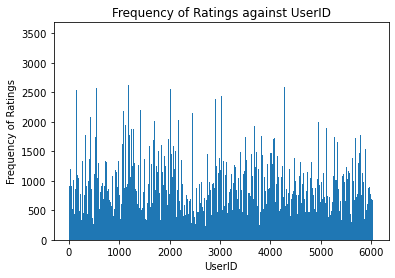

In [41]:
#usersrating = ratings.groupby(['UserID']).count()
plt.hist(ratings['UserID'],bins=1000)
plt.title("Frequency of Ratings against UserID")
plt.xlabel("UserID")
plt.ylabel("Frequency of Ratings")

## PART 1 Question 3 Answer - Each user rated how many movies?

Text(0.5, 1.0, 'Histogram of Movies')

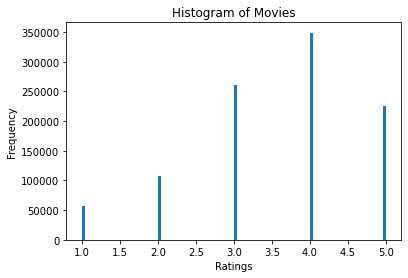

In [42]:
plt.hist(ratings['Rating'].astype(int),bins=100)
plt.xlabel("Ratings")
plt.ylabel("Frequency")
plt.title("Histogram of Movies")

## PART 1 Question 4 Answer

In [43]:
movies['Genres'].str.split("|",expand=True)
movies[['Genres','2','3','4','5','6']] = movies.Genres.str.split("|",expand=True)

Genres
Action          503
Adventure       155
Animation        90
Children's       89
Comedy         1024
Crime           131
Documentary     123
Drama          1176
Fantasy           2
Film-Noir        25
Horror          262
Musical          25
Mystery          36
Romance          50
Sci-Fi           46
Thriller        101
War              12
Western          33
Name: MovieID, dtype: int64


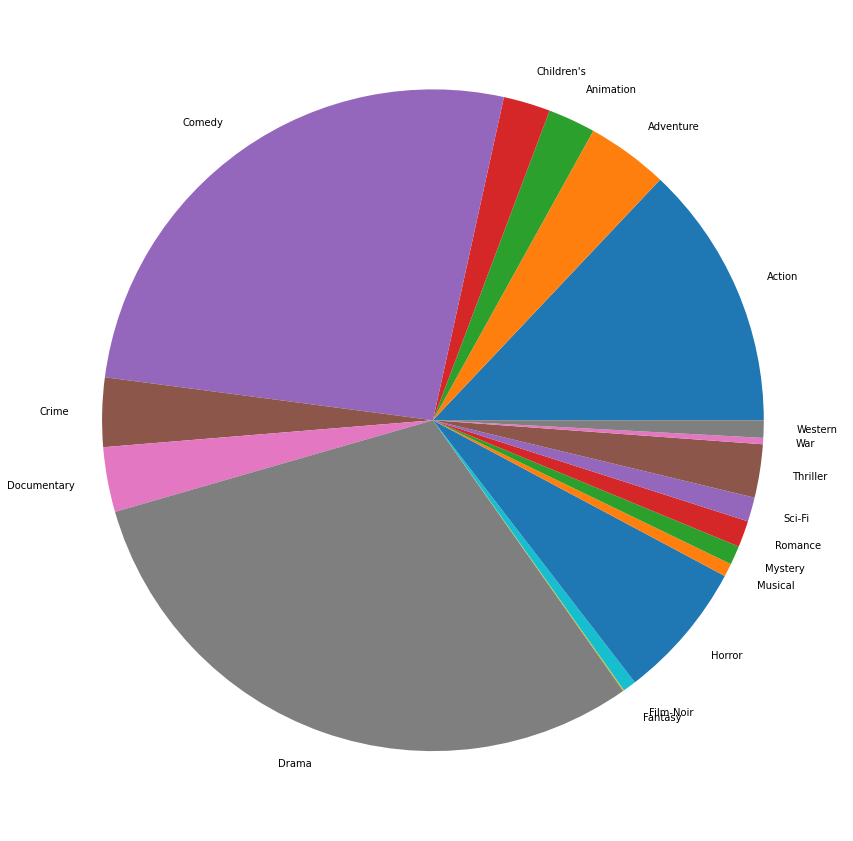

In [44]:
moviesGGB = movies.groupby(['Genres']).MovieID.count()

print(moviesGGB)

#plt.pie(movies.groupby(['Genres']).count())
fig = plt.figure(figsize =(12,12))
plt.pie(moviesGGB, labels = moviesGGB.index)
plt.tight_layout()

## PART 1 Question 5 Answer

In [134]:
movies['MovieID'].astype(int)
ratings['UserID']=ratings['UserID'].astype(int)

moviesM = movies.merge(ratings, how = 'outer')
moviesM.groupby(['MovieID']).sum()['Rating']

# movies['Average Rating'] = moviesM.groupby(['MovieID']).sum()['Rating']/moviesM.groupby(['MovieID']).nunique()['UserID']

MovieID
1       8613.0
2       2244.0
3       1442.0
4        464.0
5        890.0
         ...  
3948    3134.0
3949    1251.0
3950     198.0
3951     156.0
3952    1467.0
Name: Rating, Length: 3883, dtype: float64

In [37]:
# movies[['Title','Average Rating']].nlargest(15,['Average Rating'])

moviesM[moviesM.groupby(['MovieID']).nunique()['UserID']>=100]

C:\Users\jymch\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [153]:
movies['MovieID'].astype(int)
movies_ratings_count = pd.DataFrame(ratings.groupby(['MovieID'])['UserID'].count())
movies_ratings_count.columns = ['Count']

movies_average_ratings = pd.DataFrame(ratings.groupby('MovieID')['Rating'].mean())
print(movies_average_ratings)
print(movies_ratings_count)
print(movies_average_ratings.join(movies_ratings_count))
df = movies.set_index('MovieID').join(movies_average_ratings.join(movies_ratings_count))

df[df['Count'] > 1000].nlargest(15,'Rating')

           Rating
MovieID          
1        4.146846
2        3.201141
3        3.016736
4        2.729412
5        3.006757
...           ...
3948     3.635731
3949     4.115132
3950     3.666667
3951     3.900000
3952     3.780928

[3706 rows x 1 columns]
         Count
MovieID       
1         2077
2          701
3          478
4          170
5          296
...        ...
3948       862
3949       304
3950        54
3951        40
3952       388

[3706 rows x 1 columns]
           Rating  Count
MovieID                 
1        4.146846   2077
2        3.201141    701
3        3.016736    478
4        2.729412    170
5        3.006757    296
...           ...    ...
3948     3.635731    862
3949     4.115132    304
3950     3.666667     54
3951     3.900000     40
3952     3.780928    388

[3706 rows x 2 columns]


,Title,Genres,Rating,Count
MovieID,,,,
318,"Shawshank Redemption, The (1994)",Drama,4.554558,2227.0
858,"Godfather, The (1972)",Action|Crime|Drama,4.524966,2223.0
50,"Usual Suspects, The (1995)",Crime|Thriller,4.517106,1783.0
527,Schindler's List (1993),Drama|War,4.510417,2304.0
1198,Raiders of the Lost Ark (1981),Action|Adventure,4.477725,2514.0
904,Rear Window (1954),Mystery|Thriller,4.476190,1050.0
260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,4.453694,2991.0
750,Dr. Strangelove or: How I Learned to Stop Worr...,Sci-Fi|War,4.449890,1367.0
912,Casablanca (1942),Drama|Romance|War,4.412822,1669.0


In [75]:
dfr1=pd.DataFrame(ratings.groupby('MovieID')['UserID'].count())
print(dfr1)
dfr1.columns=['count']
dfr1=dfr1[dfr1['count']>100]

         UserID
MovieID        
1          2077
2           701
3           478
4           170
5           296
...         ...
3948        862
3949        304
3950         54
3951         40
3952        388

[3706 rows x 1 columns]


# Part 2 (60 Marks)

The following questions needs to be answered for the dataset in the below link:
 
https://grouplens.org/datasets/movielens/100k/

This dataset contains multiple files and data in this file is a tab separated. But you have to use only three files as listed below
1. u.data (The full u data set, 100000 ratings by 943 users on 1682 items. Each user has rated at least 20 movies)
2. u.item (Information about the items (movies))
3. u.user (Demographic information about the users)

For more information of the dataset pleasse go through the **README** file.


**Instructions:**
1. Load the dataset into `CSV file` by using pandas libray as a three different dataframe stated (users, ratings and movies)
2. Merge all these three dataframe into single dataframe as a `movielens` for furthur prosessing




## Questions:

**Each of the questions carry 10 marks.**  


**1.	Among Male doctors in the age group 23- 30 (10 Marks)**   
- a.  What genre of the movies they have rated 5  and count the no. of ratings for each genere?  
- b.  What genre of the movies they have rated above 3  and count the no. of ratings for each genere?  
- c.  What genre of the movies they have rated below 4  and count the no. of ratings for each genere?  
- d.  Write your inferences based on above 


**2.	Among Female healthcare professionals in the age group 23- 30 (10 Marks)**  
- a.  What genre of the movies they have rated 5  and count the no. of ratings for each genere?  
- b.  What genre of the movies they have rated above 3  and count the no. of ratings for each genere?   
- c.  What genre of the movies they have rated below 4  and count the no. of ratings for each genere?   
- d.  Write your inferences based on above    


**3.	Among Male doctors in the age group 35 – 50 (10 Marks)**   
- a.  What genre of the movies they have rated 5  and count the no. of ratings for each genere?  
- b.  What genre of the movies they have rated above 3  and count the no. of ratings for each genere?  
- c.  What genre of the movies they have rated below 4  and count the no. of ratings for each genere?  
- d.  Write your inferences based on above     
    

**4. Among Female healthcare professionals in the age group 35 - 50 (10 Marks)**  
- a.  What genre of the movies they have rated 5  and count the no. of ratings for each genere?  
- b.  What genre of the movies they have rated above 3  and count the no. of ratings for each genere?  
- c.  What genre of the movies they have rated below 4  and count the no. of ratings for each genere?  
- d.  Write your inferences based on above  

In [31]:
import pandas

u_cols = ['user','age','sex','occupation','zip_code']
users = pd.read_csv('u.user', sep='|', names=u_cols,encoding='latin-1')

r_cols = ['user','movie','rating','unix_timestamp']
ratings = pd.read_csv('u.data', sep='\t',names=r_cols,encoding = 'latin-1')

m_cols = ['movie','title','release_date','video_release_date','imdb_url','unknown','Action','Animation',"Children's", 'Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western']
movies = pd.read_csv('u.item',sep='|',names=m_cols,encoding='latin-1')

occupation = pd.read_csv("u.occupation")
genres1 = ['Action','Animation',"Children's", 'Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western']

# Part 2 Question 1a

In [32]:
# Question 1a
usersdoc = users[users['occupation'].isin(['doctor'])]
usersdoc = usersdoc[23<usersdoc['age']]
usersdoc = usersdoc[usersdoc['age']<30]
usersdoc = usersdoc[usersdoc['sex']=='M']

print(usersdoc)

rateusers = ratings.loc[ratings['user'].isin(usersdoc['user'])]
rate5docs = rateusers[rateusers['rating']==5]
movGenres = movies[movies.index.isin(rate5docs['movie'])][genres1]
movGenres.loc['Total']= movGenres.sum()
movGenres.iloc[[-1],::]

     user  age sex occupation zip_code
250   251   28   M     doctor    85032
298   299   29   M     doctor    63108


,Action,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
Total,6,0,2,15,3,0,24,0,1,2,2,0,14,7,8,8,1


In [33]:
usersdoc = users[(users.occupation == 'doctor') & (users.age < 31) & (users.age > 22) & (users.sex == 'M')]
usersdoc

,user,age,sex,occupation,zip_code
250,251,28,M,doctor,85032
298,299,29,M,doctor,63108


# Part 2 Question 1b

In [216]:
# Question 1b
usersdoc = users[users['occupation'].isin(['doctor'])]
usersdoc = usersdoc[23<usersdoc['age']]
usersdoc = usersdoc[usersdoc['age']<30]
usersdoc = usersdoc[usersdoc['sex']=='M']

rateusers = ratings.loc[ratings['user'].isin(usersdoc['user'])]
rate5docs = rateusers[rateusers['rating']>3]
movGenres = movies[movies.index.isin(rate5docs['movie'])][genres1]
movGenres.loc['Total']= movGenres.sum()
movGenres.iloc[[-1],::]

,Action,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
Total,14,6,6,61,10,6,88,0,5,6,7,9,45,20,34,20,2


# Part 2 Question 1c

In [217]:
# Question 1c
usersdoc = users[users['occupation'].isin(['doctor'])]
usersdoc = usersdoc[23<usersdoc['age']]
usersdoc = usersdoc[usersdoc['age']<30]
usersdoc = usersdoc[usersdoc['sex']=='M']

rateusers = ratings.loc[ratings['user'].isin(usersdoc['user'])]
rate5docs = rateusers[rateusers['rating']<4]
movGenres = movies[movies.index.isin(rate5docs['movie'])][genres1]
movGenres.loc['Total']= movGenres.sum()
movGenres.iloc[[-1],::]

,Action,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
Total,18,12,13,59,10,5,56,5,0,6,14,3,39,20,24,6,2


# Part 2 Question 1d

Young male doctors like to watch drama, followed by comedy.

# Part 2 Question 2a

In [218]:
# Question 2a

usersdoc = users[users['occupation'].isin(['healthcare'])]
usersdoc = usersdoc[23<usersdoc['age']]
usersdoc = usersdoc[usersdoc['age']<30]
usersdoc = usersdoc[usersdoc['sex']=='F']

rateusers = ratings.loc[ratings['user'].isin(usersdoc['user'])]
rate5docs = rateusers[rateusers['rating']==5]
movGenres = movies[movies.index.isin(rate5docs['movie'])][genres1]
movGenres.loc['Total']= movGenres.sum()
movGenres.iloc[[-1],::]

,Action,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
Total,2,0,0,5,2,0,7,0,0,0,0,1,6,2,7,2,0


# Part 2 Question 2b

In [202]:
# Question 2b

usersdoc = users[users['occupation'].isin(['healthcare'])]
usersdoc = usersdoc[23<usersdoc['age']]
usersdoc = usersdoc[usersdoc['age']<30]
usersdoc = usersdoc[usersdoc['sex']=='F']

rateusers = ratings.loc[ratings['user'].isin(usersdoc['user'])]
rate5docs = rateusers[rateusers['rating']>3]
movGenres = movies[movies.index.isin(rate5docs['movie'])][genres1]
movGenres.loc['Total']= movGenres.sum()
movGenres.iloc[[-1],::]

,Action,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
Total,13,4,6,37,11,1,49,3,0,3,2,5,23,13,33,13,0


# Part 2 Question 2c

In [203]:
# Question 2c

usersdoc = users[users['occupation'].isin(['healthcare'])]
usersdoc = usersdoc[23<usersdoc['age']]
usersdoc = usersdoc[usersdoc['age']<30]
usersdoc = usersdoc[usersdoc['sex']=='F']

rateusers = ratings.loc[ratings['user'].isin(usersdoc['user'])]
rate5docs = rateusers[rateusers['rating']<4]
movGenres = movies[movies.index.isin(rate5docs['movie'])][genres1]
movGenres.loc['Total']= movGenres.sum()
movGenres.iloc[[-1],::]

,Action,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
Total,11,2,5,27,6,0,45,2,0,1,3,3,16,9,19,9,0


# Part 2 Question 2d

Young female healthcare workers like to watch drama, followed by some comedy.

# Part 3 Question 3a

In [204]:
# Question 3a
usersdoc = users[users['occupation'].isin(['doctor'])]
usersdoc = usersdoc[35<usersdoc['age']]
usersdoc = usersdoc[usersdoc['age']<50]
usersdoc = usersdoc[usersdoc['sex']=='M']

rateusers = ratings.loc[ratings['user'].isin(usersdoc['user'])]
rate5docs = rateusers[rateusers['rating']==5]
movGenres = movies[movies.index.isin(rate5docs['movie'])][genres1]
movGenres.loc['Total']= movGenres.sum()
movGenres.iloc[[-1],::]

,Action,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
Total,2,0,0,10,7,1,16,0,1,1,0,3,6,2,10,4,1


# Part 2 Question 3b

In [219]:
# Question 3b

usersdoc = users[users['occupation'].isin(['doctor'])]
usersdoc = usersdoc[35<usersdoc['age']]
usersdoc = usersdoc[usersdoc['age']<50]
usersdoc = usersdoc[usersdoc['sex']=='M']

rateusers = ratings.loc[ratings['user'].isin(usersdoc['user'])]
rate5docs = rateusers[rateusers['rating']>3]
movGenres = movies[movies.index.isin(rate5docs['movie'])][genres1]
movGenres.loc['Total']= movGenres.sum()
movGenres.iloc[[-1],::]

,Action,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
Total,12,1,2,22,10,1,45,0,2,2,2,9,22,7,28,11,1


In [206]:
# Question 3c

usersdoc = users[users['occupation'].isin(['doctor'])]
usersdoc = usersdoc[35<usersdoc['age']]
usersdoc = usersdoc[usersdoc['age']<50]
usersdoc = usersdoc[usersdoc['sex']=='M']

rateusers = ratings.loc[ratings['user'].isin(usersdoc['user'])]
rate5docs = rateusers[rateusers['rating']<4]
movGenres = movies[movies.index.isin(rate5docs['movie'])][genres1]
movGenres.loc['Total']= movGenres.sum()
movGenres.iloc[[-1],::]

,Action,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
Total,2,1,2,8,2,0,7,1,0,2,0,0,4,3,6,0,0


# Question 3d

Older male doctors like to watch drama too and some thriller. They don't like to watch comedies as much as young male doctors do.

# Part 2 Question 4a

In [207]:
# Question 4a

usersdoc = users[users['occupation'].isin(['healthcare'])]
usersdoc = usersdoc[35<usersdoc['age']]
usersdoc = usersdoc[usersdoc['age']<50]
usersdoc = usersdoc[usersdoc['sex']=='F']

rateusers = ratings.loc[ratings['user'].isin(usersdoc['user'])]
rate5docs = rateusers[rateusers['rating']==5]
movGenres = movies[movies.index.isin(rate5docs['movie'])][genres1]
movGenres.loc['Total']= movGenres.sum()
movGenres.iloc[[-1],::]

,Action,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
Total,13,6,10,16,6,1,40,1,1,1,10,3,19,8,12,14,4


# Part 2 Question 4b

In [208]:
# Question 4b

usersdoc = users[users['occupation'].isin(['healthcare'])]
usersdoc = usersdoc[35<usersdoc['age']]
usersdoc = usersdoc[usersdoc['age']<50]
usersdoc = usersdoc[usersdoc['sex']=='F']

rateusers = ratings.loc[ratings['user'].isin(usersdoc['user'])]
rate5docs = rateusers[rateusers['rating']>3]
movGenres = movies[movies.index.isin(rate5docs['movie'])][genres1]
movGenres.loc['Total']= movGenres.sum()
movGenres.iloc[[-1],::]

,Action,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
Total,54,17,29,63,19,5,129,3,7,3,23,15,63,32,56,24,7


# Part 2 Question 4c

In [209]:
# Question 4c

usersdoc = users[users['occupation'].isin(['healthcare'])]
usersdoc = usersdoc[35<usersdoc['age']]
usersdoc = usersdoc[usersdoc['age']<50]
usersdoc = usersdoc[usersdoc['sex']=='F']

rateusers = ratings.loc[ratings['user'].isin(usersdoc['user'])]
rate5docs = rateusers[rateusers['rating']<4]
movGenres = movies[movies.index.isin(rate5docs['movie'])][genres1]
movGenres.loc['Total']= movGenres.sum()
movGenres.iloc[[-1],::]

,Action,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
Total,50,19,46,84,16,2,101,7,3,5,24,15,47,31,54,26,5


# Question 4d

Older female healthcare workers tend to watch drama, followed by romance and thriller. Similar to their younger counterpart, older healthcare workers like watch drama but they don't watch as much comedies as their younger counterpart.

**5. For each of the following graphs, write your inferences:(20 Marks)**
 1.	Age-wise Vs Gender distribution of the users who rated for the movies (10 Marks)

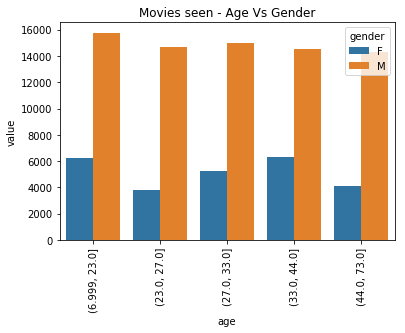


##### Cross tab with count 

|age, gender   |            F|      M |
|--------------|:-----------:|-------:|
|(6.999, 23.0]|6235|15760
|(23.0, 27.0]    |3808   |14687| 
|(27.0, 33.0]    |5276   |14977| 
|(33.0, 44.0]    |6340   |14503| 
|(44.0, 73.0]    |4081   |14333|



##### Cross tab with row % 
|age, gender   |            F|      M |
|--------------|:-----------:|-------:|
|(6.999, 23.0] |28.35       |71.65 
|(23.0, 27.0]  |20.59       |79.41 
|(27.0, 33.0]  |26.05       |73.95 
|(33.0, 44.0]  |30.42       |69.58 
|(44.0, 73.0]  |22.16       |77.84


**ANSWER:**

Male movie-goers tend to rate movies than female movie-goers, the ratio is approximately 3:1 where males are 3 times more likely to rate a movie than females.

2. Occupation-wise Vs Gender distribution of the users who rated for the movies (10 Marks)

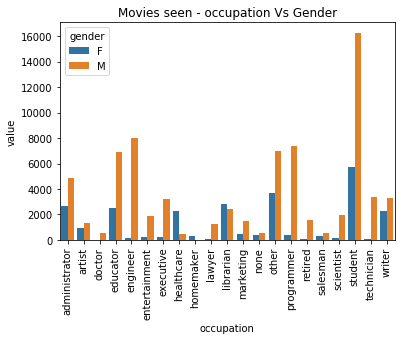
##### Cross tab with count

|Occupation|Gender Female|Gender Male|
|----------|:-----------:|----------:|  
|administrator|2654|4825|
|artist|971|1337
|doctor 	 |0 	 |540
|educator 	 |2537 	 |6905
|engineer 	 |145 	 |8030
|entertainment 	 |225 	 |1870
|executive 	 |221 	 |3182
|healthcare 	 |2307 	 |497
|homemaker 	 |269 	 |30
|lawyer 	 |69 	 |1276
librarian 	 |2860 	 |2413
|marketing 	 |442 	 |1508
|none 	 |365 	 |536
|other 	 |3665 	 |6998
|programmer 	 |419 	 |7382
|retired 	 |71 	 |1538
|salesman 	 |339 	 |517
|scientist 	 |139 	 |1919
|student 	 |5696 	 |16261
|technician 	 |108 	 |3398
|writer 	 |2238 	 |3298

##### Cross tab with row % 

|Occupation|Gender F%| Gender M%|
|----------|:-------:|---------:|
|administrator 	 |35.49 	 |64.51|
|artist 	 |42.07 	 |57.93|
|doctor 	 |0.00 	 |100.00|
|educator 	 |26.87 	 |73.13|
|engineer 	 |1.77 	 |98.23|
|entertainment 	 |10.74 	 |89.26|
|executive 	 |6.49 	 |93.51|
|healthcare 	 |82.28 	 |17.72|
|homemaker 	 |89.97 	 |10.03|
|lawyer 	 |5.13 	 |94.87|
|librarian 	 |54.24 	 |45.76|
|marketing 	 |22.67 	 |77.33|
|none 	 |40.51 	 |59.49|
|other 	 |34.37 	 |65.63|
|programmer 	 |5.37 	 |94.63|
|retired 	 |4.41 	 |95.59|
|salesman 	 |39.60 	 |60.40|
|scientist 	 |6.75 	 |93.25|
|student 	 |25.94 	 |74.06|
|technician 	 |3.08 	 |96.92|
|writer 	 |40.43 	 |59.57|


**ANSWER:**

Conclusions are difficult to be drawn from this data (i.e. statements like, 'what is the probability of someone belonging to a particular occupation and of a particular gender leaving a movie rating?').

Data pertaining to the occupations like lawyer, doctor and scientist is to be taken lightly as the base rate of a random person drawn from the larger population having these occupations is low (i.e. there are not many people who are lawyer or doctor or scientist a priori), consequently, the samples taken within the dataset belonging to these occupations may not be representative of the people belonging to these occupations in the population. In order to more accurately draw conclusions from this dataset (e.g. such as the claim 'female lawyers are less probable to rate a movie') or verify hypotheses gathered from this data, one would need to use the Bayes rule, taking into consideration, the prior distribution for each of these occupations.

Similarly, comparisons between different genders in some occupations like engineer, programmer and the like have to be done using the Bayes rule, taking into account the prior distribution of genders in these occupation. In the absence of these prior distributions, it will be difficult to draw conclusions on how genders-occupation pair influences the likelihood of someone belonging to a particular gender-occupation pair leaving a rating for a movie.

However, at first glance, it does seem likely (i.e. high likelihood) that for some occupations, males are predominantly more likely to leave a rating than females. Yet, as explained above, to conclude rigorously, one will need more information on the prior distribution for each occupation and for each gender.